In [7]:
%load_ext lab_black
import pandas as pd
from IPython.display import JSON
import warnings
import ast
import json
import matplotlib.pyplot as plt
import seaborn as sns
from pivottablejs import pivot_ui

warnings.filterwarnings("ignore")

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [8]:
df = pd.read_csv("world_cup_2022_catar.csv")
df.shape

(64, 25)

In [9]:
df.head(1)

,stage,date,pens,pens_home_score,pens_away_score,team_name_home,team_name_away,team_home_score,team_away_score,possession_home,...,duels_won_home,duels_won_away,prediction_team_home_win,prediction_draw,prediction_team_away_win,prediction_quantity,location,events_list,lineup_home,lineup_away
0,Final,18/12/2022,True,4,2,Argentina,France,3,3,54%,...,40%,60%,64%,3%,33%,1002332,Lusail Iconic Stadium,"[{'event_team': 'home', 'event_time': "" 23' "",...","[{'player_name': ' Di María ', 'player_number'...","[{'player_name': ' Giroud ', 'player_number': ..."


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   stage                     64 non-null     object
 1   date                      64 non-null     object
 2   pens                      64 non-null     bool  
 3   pens_home_score           64 non-null     object
 4   pens_away_score           64 non-null     object
 5   team_name_home            64 non-null     object
 6   team_name_away            64 non-null     object
 7   team_home_score           64 non-null     int64 
 8   team_away_score           64 non-null     int64 
 9   possession_home           64 non-null     object
 10  possession_away           64 non-null     object
 11  total_shots_home          64 non-null     int64 
 12  total_shots_away          64 non-null     int64 
 13  shots_on_target_home      64 non-null     int64 
 14  shots_on_target_away      64

In [11]:
df.describe()

,team_home_score,team_away_score,total_shots_home,total_shots_away,shots_on_target_home,shots_on_target_away,prediction_quantity
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,6.400000e+01
mean,1.578125,1.109375,11.296875,11.453125,4.312500,3.765625,4.036118e+05
std,1.551289,1.055856,5.088673,5.866043,2.617857,2.729860,2.001993e+05
min,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.304210e+05
25%,0.000000,0.000000,8.000000,7.750000,3.000000,2.000000,2.321788e+05
50%,1.000000,1.000000,10.500000,10.500000,4.000000,3.000000,3.639255e+05
75%,2.000000,2.000000,14.000000,14.000000,6.000000,5.000000,5.351200e+05
max,7.000000,4.000000,26.000000,32.000000,10.000000,12.000000,1.002332e+06


In [12]:
df.columns

Index(['stage', 'date', 'pens', 'pens_home_score', 'pens_away_score',
       'team_name_home', 'team_name_away', 'team_home_score',
       'team_away_score', 'possession_home', 'possession_away',
       'total_shots_home', 'total_shots_away', 'shots_on_target_home',
       'shots_on_target_away', 'duels_won_home', 'duels_won_away',
       'prediction_team_home_win', 'prediction_draw',
       'prediction_team_away_win', 'prediction_quantity', 'location',
       'events_list', 'lineup_home', 'lineup_away'],
      dtype='object')

### Changing porcentage dtype to be used later (Data transformation)

In [13]:
def clean_percentage_columns(df, columns_list):
    for column in columns_list:
        df[column] = df[column].astype(str)
        df[column] = df[column].str.replace("%", "")
        df[column] = df[column].astype(float)
        df[column] = df[column] / 100
    return df

In [14]:
clean_percentage_columns(
    df,
    [
        "possession_home",
        "possession_away",
        "duels_won_home",
        "duels_won_away",
        "prediction_team_home_win",
        "prediction_draw",
        "prediction_team_away_win",
        "prediction_quantity",
    ],
)

,stage,date,pens,pens_home_score,pens_away_score,team_name_home,team_name_away,team_home_score,team_away_score,possession_home,...,duels_won_home,duels_won_away,prediction_team_home_win,prediction_draw,prediction_team_away_win,prediction_quantity,location,events_list,lineup_home,lineup_away
0,Final,18/12/2022,True,4,2,Argentina,France,3,3,0.54,...,0.40,0.60,0.64,0.03,0.33,10023.32,Lusail Iconic Stadium,"[{'event_team': 'home', 'event_time': "" 23' "",...","[{'player_name': ' Di María ', 'player_number'...","[{'player_name': ' Giroud ', 'player_number': ..."
1,Match for third place,17/12/2022,False,False,False,Croatia,Morocco,2,1,0.51,...,0.53,0.47,0.42,0.04,0.54,3671.56,Khalifa International Stadium,"[{'event_team': 'home', 'event_time': "" 7' "", ...","[{'player_name': ' Livaja ', 'player_number': ...","[{'player_name': ' Boufal ', 'player_number': ..."
2,Semi-finals,14/12/2022,False,False,False,France,Morocco,2,0,0.38,...,0.58,0.42,0.58,0.03,0.39,7207.68,Al Bayt Stadium,"[{'event_team': 'home', 'event_time': "" 5' "", ...","[{'player_name': ' Giroud ', 'player_number': ...","[{'player_name': ' En-Nesyri ', 'player_number..."
3,Semi-finals,13/12/2022,False,False,False,Argentina,Croatia,3,0,0.39,...,0.43,0.57,0.71,0.04,0.25,7923.26,Lusail Iconic Stadium,"[{'event_team': 'away', 'event_time': "" 32' "",...","[{'player_name': ' Álvarez ', 'player_number':...","[{'player_name': ' Perišić ', 'player_number':..."
4,Quarter-finals,10/12/2022,False,False,False,England,France,1,2,0.58,...,0.55,0.45,0.40,0.05,0.55,6725.77,Al Bayt Stadium,"[{'event_team': 'away', 'event_time': "" 17' "",...","[{'player_name': ' Foden ', 'player_number': '...","[{'player_name': ' Giroud ', 'player_number': ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Group stage: Matchday 1,22/11/2022,False,False,False,Argentina,Saudi Arabia,1,2,0.70,...,0.64,0.36,0.94,0.02,0.04,6573.83,Lusail Iconic Stadium,"[{'event_team': 'home', 'event_time': "" 10' "",...","[{'player_name': ' Martínez ', 'player_number'...","[{'player_name': ' Al-Shehri ', 'player_number..."
60,Group stage: Matchday 1,21/11/2022,False,False,False,USA,Wales,1,1,0.59,...,0.47,0.54,0.51,0.09,0.40,3611.45,Ahmad bin Ali Stadium,"[{'event_team': 'home', 'event_time': "" 11' "",...","[{'player_name': ' Pulisic ', 'player_number':...","[{'player_name': ' James ', 'player_number': '..."
61,Group stage: Matchday 1,21/11/2022,False,False,False,Senegal,Netherlands,0,2,0.46,...,0.54,0.47,0.22,0.07,0.71,4579.77,Al Thumama Stadium,"[{'event_team': 'away', 'event_time': "" 56' "",...","[{'player_name': ' Dia ', 'player_number': ' 9...","[{'player_name': ' Bergwijn ', 'player_number'..."
62,Group stage: Matchday 1,21/11/2022,False,False,False,England,Iran,6,2,0.79,...,0.60,0.40,0.92,0.02,0.06,4987.52,Khalifa International Stadium,"[{'event_team': 'away', 'event_time': "" 20' "",...","[{'player_name': ' Kane ', 'player_number': ' ...","[{'player_name': ' Taremi ', 'player_number': ..."


### Manipulating events_list, lineup_home and lineup_away columns into new columns

#### lineup_home manipulation

In [15]:
df["lineup_home"] = df["lineup_home"].str.replace("'", '"')
df["lineup_home"] = df["lineup_home"].apply(json.loads)

# transforming lineup_home list of dictionaries into new columns
def extract_player_data(lineup):
    if not lineup or not isinstance(lineup, list):
        return None, None
    player_names = [
        player["player_name"] for player in lineup if isinstance(player, dict)
    ]
    player_numbers = [
        player["player_number"] for player in lineup if isinstance(player, dict)
    ]
    if len(player_names) != len(player_numbers):
        print(lineup)
        return None, None
    return (player_names, player_numbers)


df["player_names_home"] = df.apply(
    lambda row: extract_player_data(row["lineup_home"])[0], axis=1
)
df["player_numbers_home"] = df.apply(
    lambda row: extract_player_data(row["lineup_home"])[1], axis=1
)

# retirar o espaçamento entre os valores
df["player_names_home"] = df["player_names_home"].apply(
    lambda x: list(map(str.strip, x))
)
df["player_numbers_home"] = df["player_numbers_home"].apply(
    lambda x: list(map(str.strip, x))
)
df.drop("lineup_home", axis=1, inplace=True)

#### lineup_away manipulation

In [16]:
df["lineup_away"] = df["lineup_away"].str.replace("'", '"')
df["lineup_away"] = df["lineup_away"].apply(json.loads)

# transforming lineup_away list of dictionaries into new columns
def extract_player_data(lineup):

    if not lineup or not isinstance(lineup, list):
        return None, None
    player_names = [
        player["player_name"] for player in lineup if isinstance(player, dict)
    ]
    player_numbers = [
        player["player_number"] for player in lineup if isinstance(player, dict)
    ]
    if len(player_names) != len(player_numbers):
        print(lineup)
        return None, None
    return (player_names, player_numbers)


df["player_names_away"] = df.apply(
    lambda row: extract_player_data(row["lineup_away"])[0], axis=1
)
df["player_numbers_away"] = df.apply(
    lambda row: extract_player_data(row["lineup_away"])[1], axis=1
)

# retirar o espaçamento entre os valores
df["player_names_away"] = df["player_names_away"].apply(
    lambda x: list(map(str.strip, x))
)
df["player_numbers_away"] = df["player_numbers_away"].apply(
    lambda x: list(map(str.strip, x))
)

df.drop("lineup_away", axis=1, inplace=True)

#### events_list manipulation

In [17]:
# getting the values from "events_list" columns and transforming to another dataframe.
df_events_list = pd.DataFrame(
    columns=[
        "team",
        "event_team",
        "event_time",
        "event_type",
        "action_player_1",
        "action_player_2",
    ]
)

for i, row in df.iterrows():
    events_list = ast.literal_eval(row["events_list"])
    for event in events_list:
        if event.get("event_team") == "home":
            team = row.team_name_home
        else:
            team = row.team_name_away
        df_events_list = df_events_list.append(
            {
                "team": team,
                "event_team": event.get("event_team"),
                "event_time": event.get("event_time"),
                "event_type": event.get("event_type"),
                "action_player_1": event.get("action_player_1"),
                "action_player_2": event.get("action_player_2"),
            },
            ignore_index=True,
        )

df.drop("events_list", axis=1, inplace=True)

In [18]:
df_events_list

,team,event_team,event_time,event_type,action_player_1,action_player_2
0,Argentina,home,23',Penalty,Lionel Messi,Penalty
1,Argentina,home,36',Goal,Ángel Di María,Alexis Mac Allister
2,France,away,41',Substitution,Randal Kolo Muani,Ousmane Dembélé
3,France,away,41',Substitution,Marcus Thuram,Olivier Giroud
4,Argentina,home,52',Yellow card,Enzo Fernández,None
...,...,...,...,...,...,...
1038,Qatar,home,72',Substitution,Mohammed Muntari,Almoez Ali
1039,Ecuador,away,77',Substitution,José Cifuentes,Enner Valencia
1040,Qatar,home,78',Yellow card,Akram Afif,None
1041,Ecuador,away,90',Substitution,Kevin Rodríguez,Michael Estrada


In [19]:
# df_events_list.to_csv("datasets/df_events_list.csv", index=False)

#### Creating some statistics

In [20]:
df_global_statistics = (
    df_events_list.event_type.value_counts()
    .to_frame()
    .reset_index()
    .rename({"index": "event_type", "event_type": "total"}, axis=1)
)
# df_global_statistics.to_csv("datasets/df_global_statistics.csv", index=False)
df_global_statistics

,event_type,total
0,Substitution,587
1,Yellow card,224
2,Goal,153
3,PK,41
4,Penalty,17
5,Disallowed goal,9
6,Missed penalty,6
7,Second yellow card,3
8,Own goal,2
9,Red card,1


In [21]:
df_events_list.event_type.value_counts()

Substitution          587
Yellow card           224
Goal                  153
PK                     41
Penalty                17
Disallowed goal         9
Missed penalty          6
Second yellow card      3
Own goal                2
Red card                1
Name: event_type, dtype: int64

In [22]:
df_players_goals = df_events_list[
    (df_events_list.event_type == "Goal")
    | (df_events_list.event_type == "Penalty")
    | (df_events_list.event_type == "Own goal")
]
# df_players_goals.to_csv("datasets/df_players_goals.csv", index=False)
df_players_goals

,team,event_team,event_time,event_type,action_player_1,action_player_2
0,Argentina,home,23',Penalty,Lionel Messi,Penalty
1,Argentina,home,36',Goal,Ángel Di María,Alexis Mac Allister
9,France,away,80',Penalty,Kylian Mbappé,Penalty
10,France,away,81',Goal,Kylian Mbappé,Marcus Thuram
18,Argentina,home,108',Goal,Lionel Messi,None
...,...,...,...,...,...,...
1023,England,home,71',Goal,Marcus Rashford,Harry Kane
1026,England,home,90',Goal,Jack Grealish,Callum Wilson
1027,Iran,away,103',Penalty,Mehdi Taremi,Penalty
1030,Ecuador,away,16',Penalty,Enner Valencia,Penalty


In [23]:
df_players_goals.team.value_counts().to_frame().reset_index().rename(
    {"index": "team", "team": "total_goals"}, axis=1
)

,team,total_goals
0,France,16
1,Argentina,15
2,England,13
3,Portugal,12
4,Netherlands,10
5,Spain,9
6,Croatia,8
7,Brazil,8
8,Morocco,6
9,Germany,6


In [24]:
# df_players_goals.to_csv("datasets/goals_per_team.csv", index=False)

In [25]:
# top scorer

df_players_goals.action_player_1.value_counts().to_frame().reset_index().rename(
    {"index": "player_name", "action_player_1": "total_goals"}, axis=1
)

,player_name,total_goals
0,Kylian Mbappé,8
1,Lionel Messi,7
2,Julián Álvarez,4
3,Olivier Giroud,4
4,Richarlison,3
...,...,...
113,Ao Tanaka,1
114,Hwang Hee-chan,1
115,Kim Young-gwon,1
116,Ricardo Horta,1


In [26]:
# df_players_goals.to_csv("datasets/top_scores.csv", index=False)

In [27]:
# top assists
top_assists = (
    df_players_goals.action_player_2.value_counts()
    .to_frame()
    .reset_index()
    .rename({"index": "player_name", "action_player_2": "total_assists"}, axis=1)
    .drop(index=0)
    .reset_index(drop=True)
)
top_assists

,player_name,total_assists
0,Harry Kane,3
1,Ivan Perišić,3
2,Lionel Messi,3
3,Antoine Griezmann,3
4,Bruno Fernandes,3
...,...,...
89,David Raum,1
90,Kaoru Mitoma,1
91,Junya Ito,1
92,César Azpilicueta,1


In [28]:
df

,stage,date,pens,pens_home_score,pens_away_score,team_name_home,team_name_away,team_home_score,team_away_score,possession_home,...,duels_won_away,prediction_team_home_win,prediction_draw,prediction_team_away_win,prediction_quantity,location,player_names_home,player_numbers_home,player_names_away,player_numbers_away
0,Final,18/12/2022,True,4,2,Argentina,France,3,3,0.54,...,0.60,0.64,0.03,0.33,10023.32,Lusail Iconic Stadium,"[Di María, Álvarez, Messi, Mac Allister, Ferná...","[11, 9, 10, 20, 24, 7, 3, 19, 13, 26, 23]","[Giroud, Mbappé, Griezmann, Dembélé, Rabiot, T...","[9, 10, 7, 11, 14, 8, 22, 18, 4, 5, 1]"
1,Match for third place,17/12/2022,False,False,False,Croatia,Morocco,2,1,0.51,...,0.47,0.42,0.04,0.54,3671.56,Khalifa International Stadium,"[Livaja, Oršić, Kramarić, Majer, Kovačić, Modr...","[14, 18, 9, 7, 8, 10, 4, 20, 24, 2, 1]","[Boufal, En-Nesyri, Ziyech, Sabiri, Amrabat, E...","[17, 19, 7, 11, 4, 23, 25, 20, 18, 2, 1]"
2,Semi-finals,14/12/2022,False,False,False,France,Morocco,2,0,0.38,...,0.42,0.58,0.03,0.39,7207.68,Al Bayt Stadium,"[Giroud, Mbappé, Griezmann, Dembélé, Fofana, T...","[9, 10, 7, 11, 13, 8, 22, 24, 4, 5, 1]","[En-Nesyri, Boufal, Amrabat, Ounahi, Ziyech, M...","[19, 17, 4, 8, 7, 3, 18, 6, 20, 2, 1]"
3,Semi-finals,13/12/2022,False,False,False,Argentina,Croatia,3,0,0.39,...,0.57,0.71,0.04,0.25,7923.26,Lusail Iconic Stadium,"[Álvarez, Messi, Mac Allister, Fernández, Pare...","[9, 10, 20, 24, 5, 7, 3, 19, 13, 26, 23]","[Perišić, Kramarić, Pašalić, Kovačić, Brozović...","[4, 9, 15, 8, 11, 10, 19, 20, 6, 22, 1]"
4,Quarter-finals,10/12/2022,False,False,False,England,France,1,2,0.58,...,0.45,0.40,0.05,0.55,6725.77,Al Bayt Stadium,"[Foden, Kane, Saka, Bellingham, Rice, Henderso...","[20, 9, 17, 22, 4, 8, 3, 6, 5, 2, 1]","[Giroud, Mbappé, Griezmann, Dembélé, Rabiot, T...","[9, 10, 7, 11, 14, 8, 22, 18, 4, 5, 1]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Group stage: Matchday 1,22/11/2022,False,False,False,Argentina,Saudi Arabia,1,2,0.70,...,0.36,0.94,0.02,0.04,6573.83,Lusail Iconic Stadium,"[Martínez, Messi, Gómez, Paredes, De Paul, Di ...","[22, 10, 17, 5, 7, 11, 3, 19, 13, 26, 23]","[Al-Shehri, Al-Dawsari, Kanno, Al-Faraj, Al-Bu...","[11, 10, 23, 7, 9, 8, 13, 5, 17, 12, 21]"
60,Group stage: Matchday 1,21/11/2022,False,False,False,USA,Wales,1,1,0.59,...,0.54,0.51,0.09,0.40,3611.45,Ahmad bin Ali Stadium,"[Pulisic, Sargent, Weah, Musah, Adams, McKenni...","[10, 24, 21, 6, 4, 8, 5, 13, 3, 2, 1]","[James, Bale, Williams, Wilson, Ampadu, Ramsey...","[20, 11, 3, 8, 15, 10, 14, 4, 6, 5, 1]"
61,Group stage: Matchday 1,21/11/2022,False,False,False,Senegal,Netherlands,0,2,0.46,...,0.47,0.22,0.07,0.71,4579.77,Al Thumama Stadium,"[Dia, Sarr, Gueye, Diatta, Mendy, Kouyaté, Dia...","[9, 18, 5, 15, 6, 8, 22, 4, 3, 21, 16]","[Bergwijn, Janssen, Gakpo, Blind, De Jong, Ber...","[7, 18, 8, 17, 21, 11, 22, 5, 4, 3, 23]"
62,Group stage: Matchday 1,21/11/2022,False,False,False,England,Iran,6,2,0.79,...,0.40,0.92,0.02,0.06,4987.52,Khalifa International Stadium,"[Kane, Sterling, Mount, Saka, Rice, Bellingham...","[9, 10, 19, 17, 4, 22, 3, 6, 5, 12, 1]","[Taremi, Hajsafi, Karimi, Nourollahi, Jahanbak...","[9, 3, 18, 21, 7, 5, 19, 15, 8, 2, 1]"


In [29]:
# top_assists.to_csv("datasets/top_assists.csv", index=False)

#### Ball possession versus victory

In [30]:
columns = [
    "pens",
    "pens_home_score",
    "pens_away_score",
    "team_name_home",
    "team_name_away",
    "team_home_score",
    "team_away_score",
    "possession_home",
    "possession_away",
]
df_ball_possession = df[columns]
df_ball_possession

,pens,pens_home_score,pens_away_score,team_name_home,team_name_away,team_home_score,team_away_score,possession_home,possession_away
0,True,4,2,Argentina,France,3,3,0.54,0.46
1,False,False,False,Croatia,Morocco,2,1,0.51,0.49
2,False,False,False,France,Morocco,2,0,0.38,0.62
3,False,False,False,Argentina,Croatia,3,0,0.39,0.61
4,False,False,False,England,France,1,2,0.58,0.42
...,...,...,...,...,...,...,...,...,...
59,False,False,False,Argentina,Saudi Arabia,1,2,0.70,0.30
60,False,False,False,USA,Wales,1,1,0.59,0.41
61,False,False,False,Senegal,Netherlands,0,2,0.46,0.54
62,False,False,False,England,Iran,6,2,0.79,0.21


In [31]:
for index, row in df_ball_possession.iterrows():
    if row.pens == True:
        if row.pens_home_score > row.pens_away_score:
            df_ball_possession.loc[index, "who_won"] = df_ball_possession.loc[
                index, "team_name_home"
            ]
        else:
            df_ball_possession.loc[index, "who_won"] = df_ball_possession.loc[
                index, "team_name_away"
            ]
    else:
        if row.team_home_score > row.team_away_score:
            df_ball_possession.loc[index, "who_won"] = df_ball_possession.loc[
                index, "team_name_home"
            ]
        elif row.team_home_score < row.team_away_score:
            df_ball_possession.loc[index, "who_won"] = df_ball_possession.loc[
                index, "team_name_away"
            ]
        else:
            df_ball_possession.loc[index, "who_won"] = "Draw"
df_ball_possession

,pens,pens_home_score,pens_away_score,team_name_home,team_name_away,team_home_score,team_away_score,possession_home,possession_away,who_won
0,True,4,2,Argentina,France,3,3,0.54,0.46,Argentina
1,False,False,False,Croatia,Morocco,2,1,0.51,0.49,Croatia
2,False,False,False,France,Morocco,2,0,0.38,0.62,France
3,False,False,False,Argentina,Croatia,3,0,0.39,0.61,Argentina
4,False,False,False,England,France,1,2,0.58,0.42,France
...,...,...,...,...,...,...,...,...,...,...
59,False,False,False,Argentina,Saudi Arabia,1,2,0.70,0.30,Saudi Arabia
60,False,False,False,USA,Wales,1,1,0.59,0.41,Draw
61,False,False,False,Senegal,Netherlands,0,2,0.46,0.54,Netherlands
62,False,False,False,England,Iran,6,2,0.79,0.21,England


In [32]:
for index, row in df_ball_possession.iterrows():
    if row.who_won != "Draw":
        if (row.possession_home > row.possession_away) & (
            row.team_name_home == row.who_won
        ):
            df_ball_possession.loc[index, "ball_possession_analysis"] = "Y"
        elif (row.possession_away > row.possession_home) & (
            row.team_name_away == row.who_won
        ):
            df_ball_possession.loc[index, "ball_possession_analysis"] = "Y"
        else:
            df_ball_possession.loc[index, "ball_possession_analysis"] = "N"
    else:
        df_ball_possession.loc[index, "ball_possession_analysis"] = "Draw"

In [33]:
df_ball_possession.ball_possession_analysis.value_counts()

Y       27
N       27
Draw    10
Name: ball_possession_analysis, dtype: int64

In [34]:
# df_ball_possession.to_csv("datasets/ball_possession.csv", index=False)

In [35]:
df_ball_possession[df_ball_possession.ball_possession_analysis == "Y"]

,pens,pens_home_score,pens_away_score,team_name_home,team_name_away,team_home_score,team_away_score,possession_home,possession_away,who_won,ball_possession_analysis
0,True,4,2,Argentina,France,3,3,0.54,0.46,Argentina,Y
1,False,False,False,Croatia,Morocco,2,1,0.51,0.49,Croatia,Y
7,True,4,2,Croatia,Brazil,1,1,0.51,0.49,Croatia,Y
10,False,False,False,Brazil,South Korea,4,1,0.54,0.46,Brazil,Y
11,True,1,3,Japan,Croatia,1,1,0.41,0.59,Croatia,Y
12,False,False,False,England,Senegal,3,0,0.62,0.38,England,Y
13,False,False,False,France,Poland,3,1,0.55,0.45,France,Y
14,False,False,False,Argentina,Australia,2,1,0.61,0.39,Argentina,Y
21,False,False,False,Costa Rica,Germany,2,4,0.31,0.69,Germany,Y
24,False,False,False,Saudi Arabia,Mexico,1,2,0.39,0.61,Mexico,Y


#### Identify which players have the biggest impact on matches

In [82]:
lineup = []
for i in range(len(df)):
    for player in df["player_names_home"][i]:
        lineup.append([df["team_name_home"][i], df["date"][i], player])
    for player in df["player_names_away"][i]:
        lineup.append([df["team_name_away"][i], df["date"][i], player])

lineup_count = pd.DataFrame(lineup, columns=["team", "date", "player"])
lineup_count = lineup_count.drop_duplicates()
lineup_count = (
    lineup_count.groupby(["team", "player"]).size().reset_index(name="counts")
)

In [83]:
lineup_count

,team,player,counts
0,Argentina,Acuña,4
1,Argentina,De Paul,7
2,Argentina,Di María,4
3,Argentina,Fernández,5
4,Argentina,Gómez,2
...,...,...,...
505,Wales,Roberts,2
506,Wales,Rodon,3
507,Wales,Ward,1
508,Wales,Williams,3


In [84]:
winners = df[df["team_home_score"] > df["team_away_score"]][
    ["team_name_home", "player_names_home"]
]
winners = pd.concat(
    [
        winners,
        df[df["team_away_score"] > df["team_home_score"]][
            ["team_name_away", "player_names_away"]
        ],
    ]
)
winners_count = (
    winners.explode("player_names_home")
    .groupby(["team_name_home", "player_names_home"])["player_names_home"]
    .count()
    .reset_index(name="wins")
)
winners_count.rename(
    columns={"team_name_home": "team", "player_names_home": "player"}, inplace=True
)

# Juntando com lineup_count
lineup_count = lineup_count.merge(winners_count, on=["team", "player"], how="left")
lineup_count["wins"].fillna(0, inplace=True)

# Criando nova coluna com porcentagem de vitória
lineup_count["win_percentage"] = lineup_count["wins"] / lineup_count["counts"]

In [85]:
lineup_count

,team,player,counts,wins,win_percentage
0,Argentina,Acuña,4,2.0,0.500000
1,Argentina,De Paul,7,3.0,0.428571
2,Argentina,Di María,4,1.0,0.250000
3,Argentina,Fernández,5,2.0,0.400000
4,Argentina,Gómez,2,1.0,0.500000
...,...,...,...,...,...
505,Wales,Roberts,2,0.0,0.000000
506,Wales,Rodon,3,0.0,0.000000
507,Wales,Ward,1,0.0,0.000000
508,Wales,Williams,3,0.0,0.000000


In [87]:
top_players = (
    lineup_count[lineup_count.counts > 2]
    .sort_values(by="win_percentage", ascending=False)
    .head(10)
)
top_players

,team,player,counts,wins,win_percentage
329,Portugal,Dias,4,3.0,0.75
57,Brazil,Marquinhos,4,3.0,0.75
56,Brazil,Lucas Paquetá,4,3.0,0.75
61,Brazil,Richarlison,4,3.0,0.75
65,Brazil,Vinícius Júnior,4,3.0,0.75
49,Brazil,Casemiro,4,3.0,0.75
331,Portugal,Félix,4,3.0,0.75
330,Portugal,Fernandes,4,3.0,0.75
60,Brazil,Raphinha,4,3.0,0.75
46,Brazil,Alisson,4,3.0,0.75


In [88]:
top_players_stats = df[
    df.apply(
        lambda x: any(i in x["player_names_home"] for i in top_players["player"])
        or any(i in x["player_names_away"] for i in top_players["player"]),
        axis=1,
    )
]
top_players_stats

,stage,date,pens,pens_home_score,pens_away_score,team_name_home,team_name_away,team_home_score,team_away_score,possession_home,...,duels_won_away,prediction_team_home_win,prediction_draw,prediction_team_away_win,prediction_quantity,location,player_names_home,player_numbers_home,player_names_away,player_numbers_away
5,Quarter-finals,10/12/2022,False,False,False,Morocco,Portugal,1,0,0.26,...,0.52,0.33,0.03,0.64,6411.52,Al Thumama Stadium,"[Boufal, En-Nesyri, Ziyech, Amallah, Amrabat, ...","[17, 19, 7, 15, 4, 8, 25, 6, 18, 2, 1]","[Félix, Ramos, Fernandes, Otávio, Neves, Berna...","[11, 26, 8, 25, 18, 10, 5, 4, 3, 2, 22]"
7,Quarter-finals,09/12/2022,True,4,2,Croatia,Brazil,1,1,0.51,...,0.45,0.11,0.03,0.86,6469.99,Education City Stadium,"[Perišić, Kramarić, Pašalić, Kovačić, Brozović...","[4, 9, 15, 8, 11, 10, 19, 20, 6, 22, 1]","[Richarlison, Vinícius Júnior, Neymar, Raphinh...","[9, 20, 10, 11, 5, 7, 2, 3, 4, 14, 1]"
8,Round of 16,06/12/2022,False,False,False,Portugal,Switzerland,6,1,0.47,...,0.44,0.80,0.03,0.17,4872.90,Lusail Iconic Stadium,"[Félix, Ramos, Fernandes, Bernardo Silva, Carv...","[11, 26, 8, 10, 14, 25, 5, 4, 3, 2, 22]","[Shaqiri, Embolo, Vargas, Freuler, Sow, Fernan...","[23, 7, 17, 8, 15, 2, 10, 13, 22, 5, 1]"
10,Round of 16,05/12/2022,False,False,False,Brazil,South Korea,4,1,0.54,...,0.54,0.90,0.02,0.08,6106.45,Stadium 974,"[Richarlison, Vinícius Júnior, Neymar, Raphinh...","[9, 20, 10, 11, 5, 7, 2, 3, 4, 14, 1]","[Son Heung-min, Cho Gue-sung, Hwang Hee-chan, ...","[7, 9, 11, 6, 5, 10, 3, 19, 4, 15, 1]"
32,Group stage: Matchday 2,28/11/2022,False,False,False,Portugal,Uruguay,2,0,0.60,...,0.42,0.75,0.07,0.18,3949.17,Lusail Iconic Stadium,"[Félix, Ronaldo, Fernandes, Carvalho, Bernardo...","[11, 7, 8, 14, 10, 18, 19, 4, 3, 20, 22]","[Cavani, Núñez, Olivera, Vecino, Bentancur, Va...","[21, 11, 16, 5, 6, 15, 13, 19, 3, 2, 23]"
33,Group stage: Matchday 2,28/11/2022,False,False,False,Brazil,Switzerland,1,0,0.54,...,0.41,0.90,0.03,0.07,5878.57,Stadium 974,"[Vinícius Júnior, Richarlison, Raphinha, Lucas...","[20, 9, 11, 7, 5, 8, 6, 3, 4, 14, 1]","[Embolo, Vargas, Sow, Rieder, Xhaka, Freuler, ...","[7, 17, 15, 25, 10, 8, 13, 4, 5, 3, 1]"
48,Group stage: Matchday 1,24/11/2022,False,False,False,Brazil,Serbia,2,0,0.59,...,0.51,0.91,0.03,0.06,9191.30,Lusail Iconic Stadium,"[Richarlison, Vinícius Júnior, Neymar, Raphinh...","[9, 20, 10, 11, 5, 7, 6, 3, 4, 2, 1]","[Mitrović, Milinković-Savić, Tadić, Mladenović...","[9, 20, 10, 25, 8, 16, 14, 2, 5, 4, 23]"
49,Group stage: Matchday 1,24/11/2022,False,False,False,Portugal,Ghana,3,2,0.62,...,0.43,0.89,0.03,0.08,5557.77,Stadium 974,"[Félix, Ronaldo, Fernandes, Otávio, Neves, Ber...","[11, 7, 8, 25, 18, 10, 5, 13, 4, 20, 22]","[Iñaki Williams, André Ayew, Kudus, Abdul Same...","[19, 10, 20, 21, 5, 17, 4, 23, 18, 26, 1]"


##### Charts about it

In [89]:
lineup_count.sort_values("counts", ascending=False)

,team,player,counts,wins,win_percentage
278,Morocco,Amrabat,7,1.0,0.142857
117,Croatia,Gvardiol,7,2.0,0.285714
1,Argentina,De Paul,7,3.0,0.428571
122,Croatia,Livaković,7,2.0,0.285714
120,Croatia,Kramarić,7,2.0,0.285714
...,...,...,...,...,...
172,England,Rashford,1,0.0,0.000000
396,Serbia,Mladenović,1,0.0,0.000000
161,Ecuador,Porozo,1,0.0,0.000000
400,Serbia,Vlahović,1,0.0,0.000000


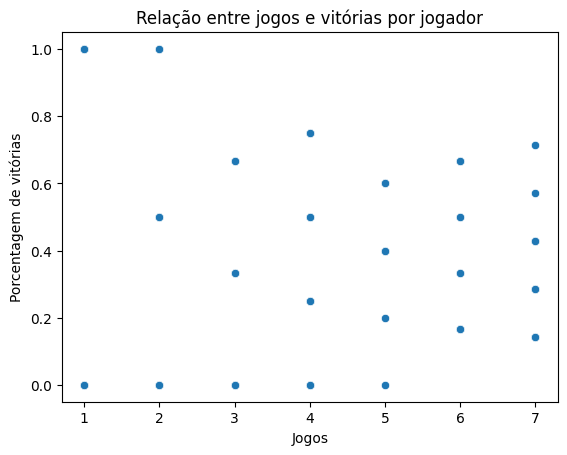

In [90]:
sns.scatterplot(x="counts", y="win_percentage", data=lineup_count)
plt.xlabel("Jogos")
plt.ylabel("Porcentagem de vitórias")
plt.title("Relação entre jogos e vitórias por jogador")
plt.show()

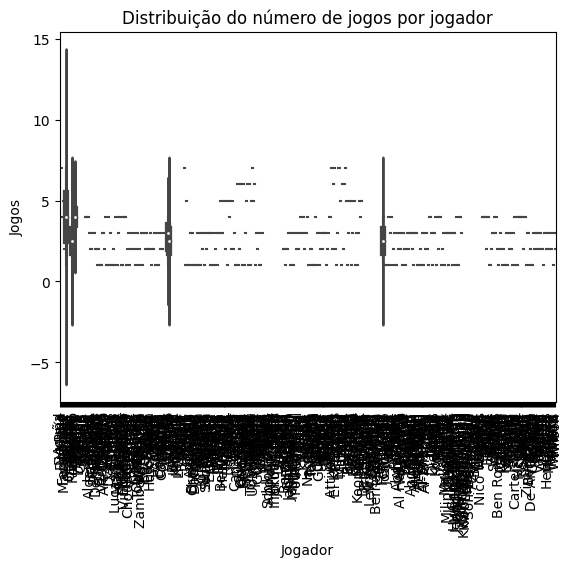

In [91]:
sns.violinplot(x="player", y="counts", data=lineup_count)
plt.xlabel("Jogador")
plt.ylabel("Jogos")
plt.title("Distribuição do número de jogos por jogador")
plt.xticks(rotation=90)
plt.show()

#### Relationship between the number of goals scored and the number of shots on goal

In [95]:
df.columns

Index(['stage', 'date', 'pens', 'pens_home_score', 'pens_away_score',
       'team_name_home', 'team_name_away', 'team_home_score',
       'team_away_score', 'possession_home', 'possession_away',
       'total_shots_home', 'total_shots_away', 'shots_on_target_home',
       'shots_on_target_away', 'duels_won_home', 'duels_won_away',
       'prediction_team_home_win', 'prediction_draw',
       'prediction_team_away_win', 'prediction_quantity', 'location',
       'player_names_home', 'player_numbers_home', 'player_names_away',
       'player_numbers_away'],
      dtype='object')

In [100]:
columns = [
    "team_name_home",
    "team_name_away",
    "team_home_score",
    "team_away_score",
    "total_shots_home",
    "total_shots_away",
    "shots_on_target_home",
    "shots_on_target_away",
]
df_efetive_goals = df[columns]
df_efetive_goals

,team_name_home,team_name_away,team_home_score,team_away_score,total_shots_home,total_shots_away,shots_on_target_home,shots_on_target_away
0,Argentina,France,3,3,20,10,10,5
1,Croatia,Morocco,2,1,12,9,4,2
2,France,Morocco,2,0,14,13,3,3
3,Argentina,Croatia,3,0,9,12,7,2
4,England,France,1,2,16,8,8,5
...,...,...,...,...,...,...,...,...
59,Argentina,Saudi Arabia,1,2,15,3,6,2
60,USA,Wales,1,1,6,7,1,3
61,Senegal,Netherlands,0,2,15,10,4,3
62,England,Iran,6,2,13,8,7,3


In [106]:
for index, row in df_efetive_goals.iterrows():
    if row.shots_on_target_home != 0:
        df_efetive_goals.loc[
            index, "percentage_goals_per_shots_on_target_home"
        ] = round((row.team_home_score / row.shots_on_target_home), 3)
    else:
        df_efetive_goals.loc[index, "percentage_goals_per_shots_on_target_home"] = 0
    if row.shots_on_target_away != 0:
        df_efetive_goals.loc[
            index, "percentage_goals_per_shots_on_target_away"
        ] = round((row.team_away_score / row.shots_on_target_away), 3)
    else:
        df_efetive_goals.loc[index, "percentage_goals_per_shots_on_target_away"] = 0

In [112]:
grouped_df_efetive_goals = df_efetive_goals.groupby("team_name_home")
mean_df_home = (
    grouped_df_efetive_goals["percentage_goals_per_shots_on_target_home"]
    .mean()
    .reset_index()
)
mean_df_home = mean_df_home.rename(columns={"team_name_home": "team"})
mean_df_home

,team,percentage_goals_per_shots_on_target_home
0,Argentina,0.459200
1,Australia,0.250000
2,Belgium,0.166500
3,Brazil,0.288667
4,Cameroon,0.354000
5,Canada,0.000000
6,Costa Rica,0.333000
7,Croatia,0.475000
8,Denmark,0.000000
9,Ecuador,0.250000


In [114]:
grouped_df_efetive_goals = df_efetive_goals.groupby("team_name_away")
mean_df_away = (
    grouped_df_efetive_goals["percentage_goals_per_shots_on_target_away"]
    .mean()
    .reset_index()
)
mean_df_away = mean_df_away.rename(columns={"team_name_away": "team"})
mean_df_away

,team,percentage_goals_per_shots_on_target_away
0,Argentina,0.283500
1,Australia,0.833333
2,Belgium,0.000000
3,Brazil,0.045500
4,Cameroon,0.000000
5,Canada,0.250000
6,Costa Rica,0.500000
7,Croatia,0.083333
8,Denmark,0.250000
9,Ecuador,0.458500
